**Predict Employee Attrition**

In [1]:
import pandas as pd

Get the data

In [2]:
data = pd.read_csv('/content/Attrition_data.csv')

In [3]:
#Display the first few rows to understand the data
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.shape

(4410, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
#Descriptive Statistics
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**Check Duplicates**

In [8]:
data.duplicated().value_counts()

False    4410
Name: count, dtype: int64

In [9]:
data.drop_duplicates(inplace = True)
data.shape

(4410, 29)

**Checking missing value**

In [10]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [11]:
data.dropna(inplace = True)

In [12]:
data.shape

(4300, 29)

In [13]:
data.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

**Target Variable**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

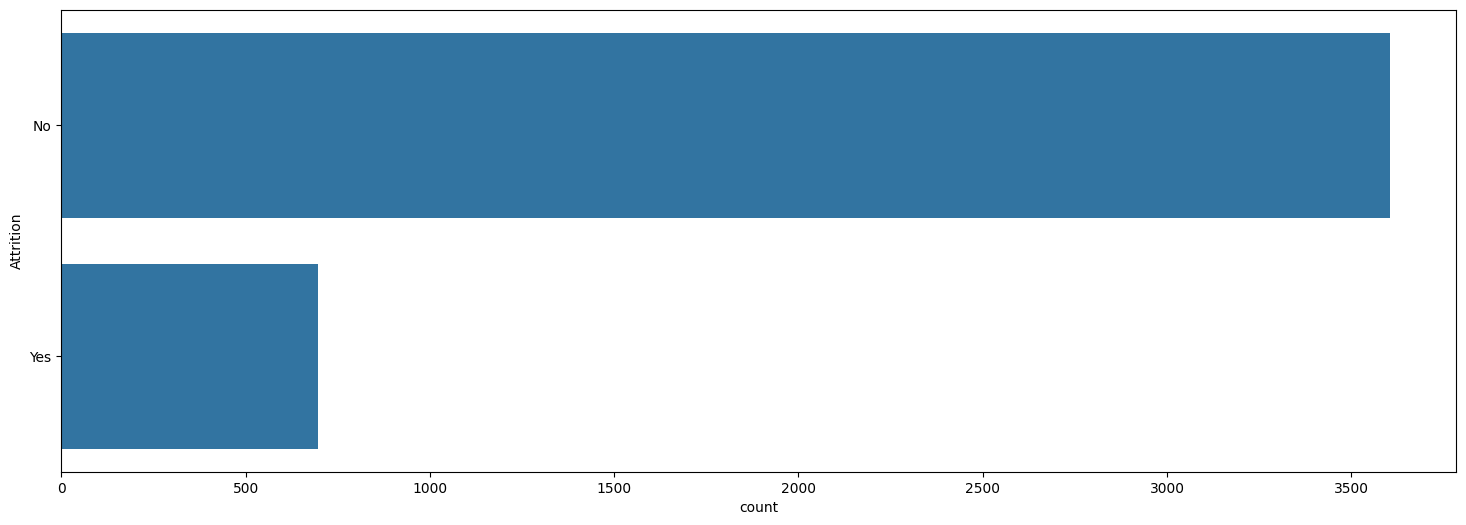

In [15]:
plt.figure(figsize = (18,6))
sns.countplot(y='Attrition', data=data)
plt.show()

In [16]:
#here we can see that it is imbalanced dataset

**EDA**

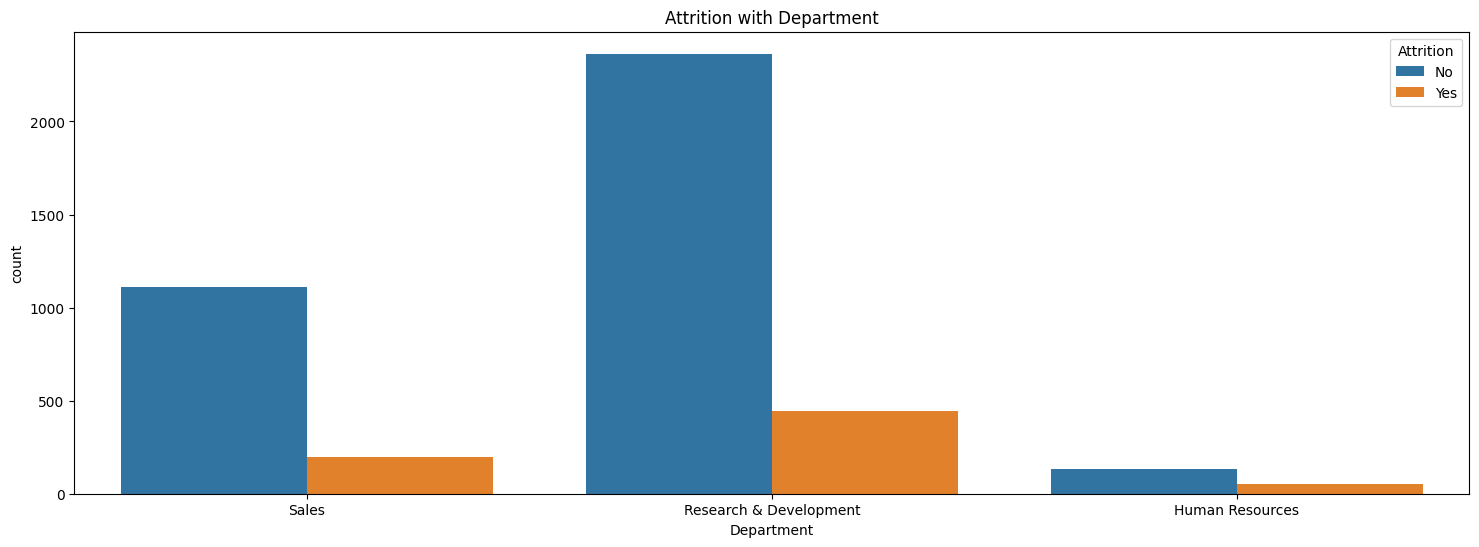

In [17]:
#Department with Attrition
plt.figure(figsize = (18,6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title("Attrition with Department")
plt.show()

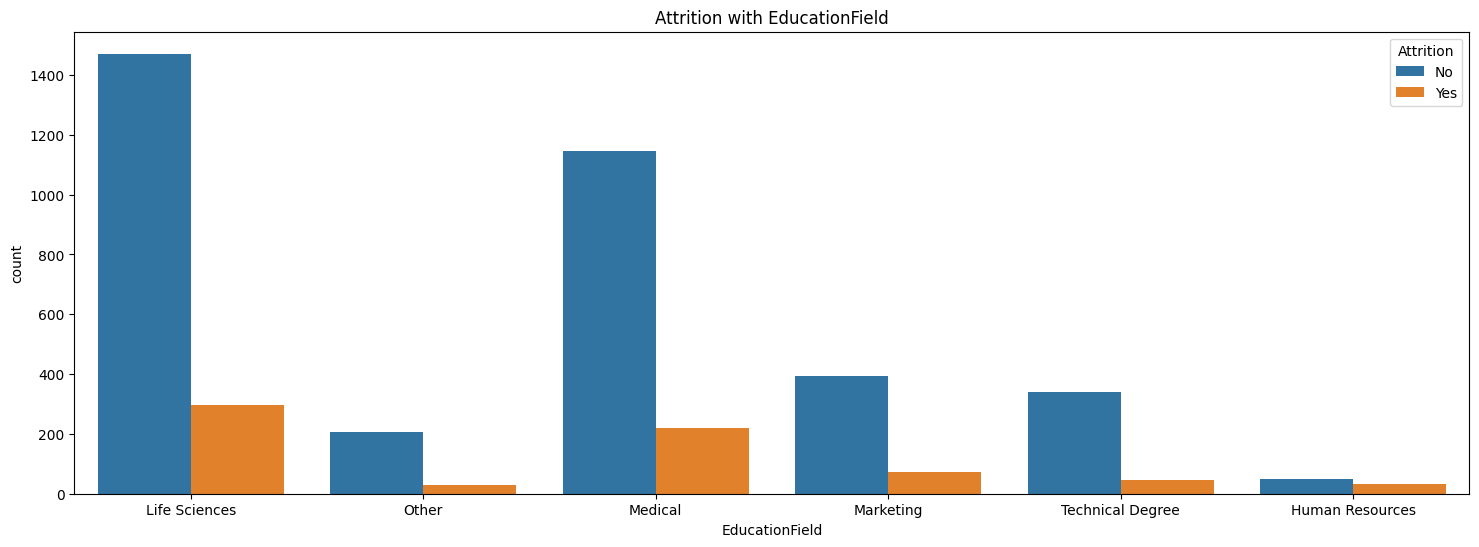

In [18]:
#EducationField with Attrition
plt.figure(figsize = (18,6))
sns.countplot(x='EducationField', hue='Attrition', data=data)
plt.title("Attrition with EducationField")
plt.show()

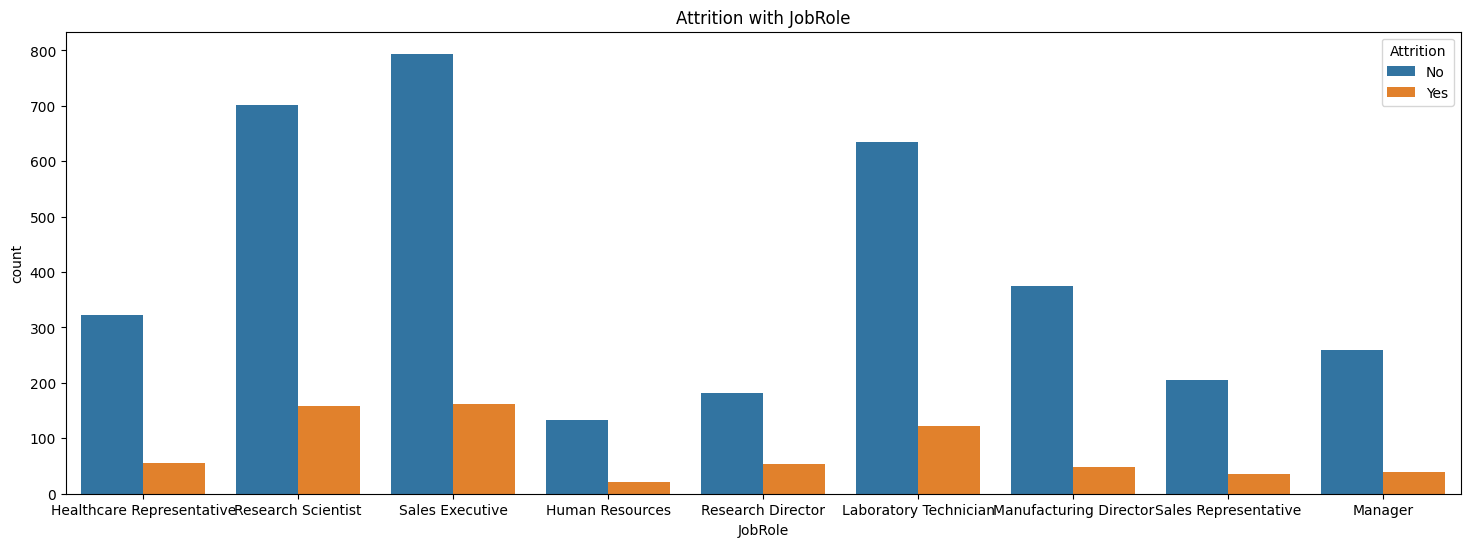

In [19]:
#JobRole with Attrition
plt.figure(figsize = (18,6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.title("Attrition with JobRole")
plt.show()

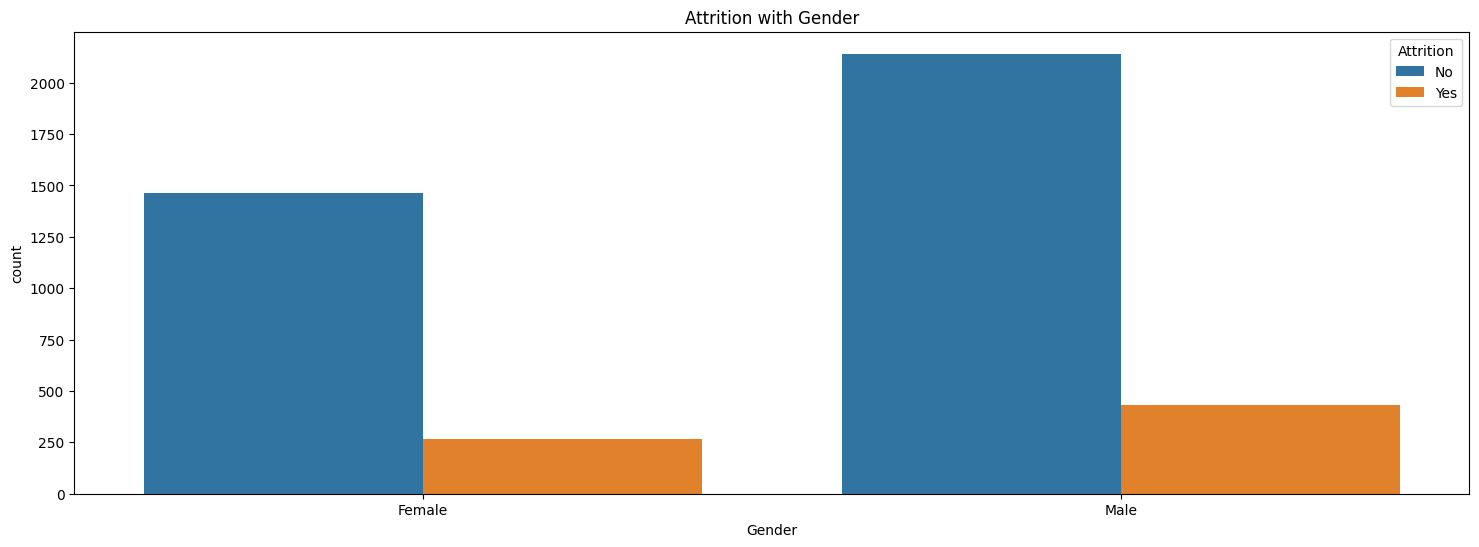

In [20]:
#Gender with Attrition
plt.figure(figsize = (18,6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title("Attrition with Gender")
plt.show()

<ipython-input-21-009ffcf54fe5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=False)


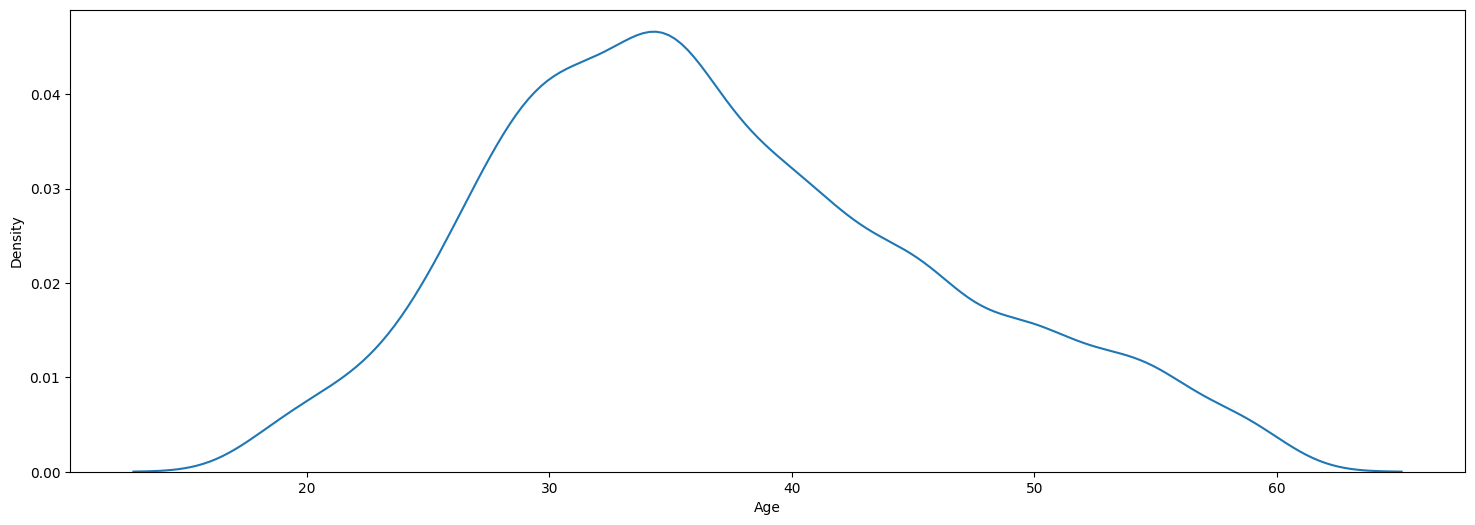

In [21]:
#distribution of age
plt.figure(figsize = (18,6))
sns.distplot(data['Age'], hist=False)
plt.show()

In [22]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                   'PerformanceRating']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating
0,2,3.0,3,4.0,3
1,1,3.0,2,2.0,4
2,4,2.0,3,2.0,3
3,5,4.0,2,4.0,3
4,1,4.0,3,1.0,3


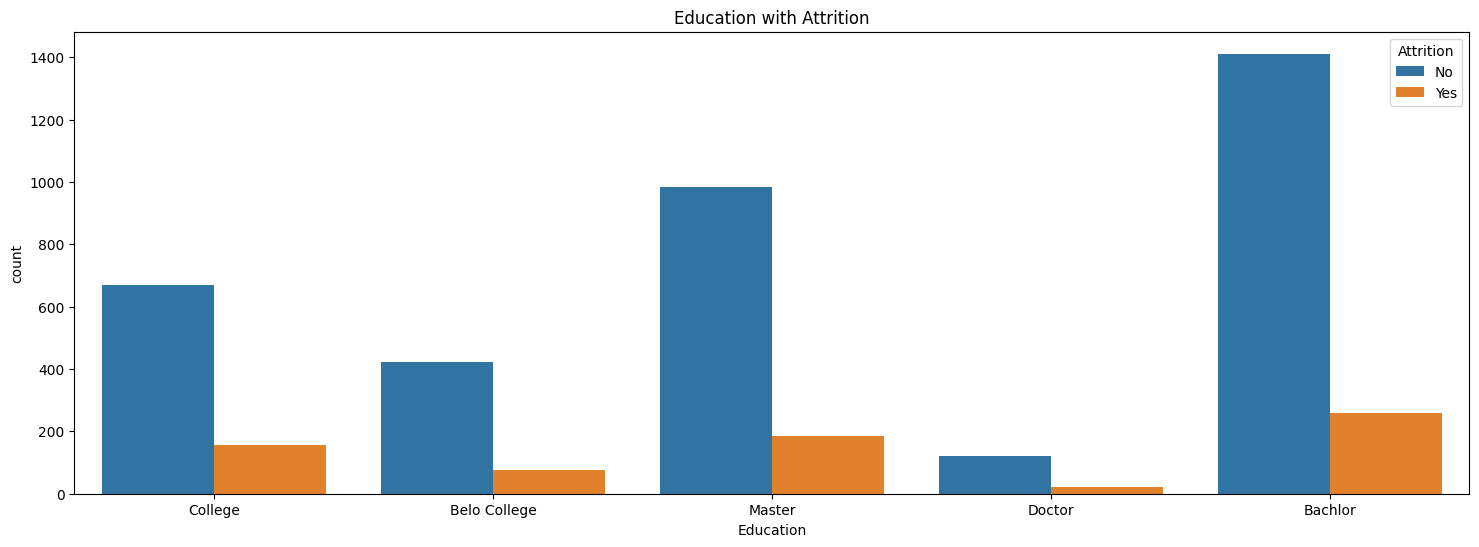

In [23]:
edu_map = {1:'Belo College', 2:'College', 3:'Bachlor', 4:'Master', 5:'Doctor'}
plt.figure(figsize = (18,6))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data)
plt.title("Education with Attrition")
plt.show()

**Label Encoding**

In [24]:
#Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No': 0, 'Yes': 1})

In [25]:
#Apply label encoder to categorical variable
from sklearn.preprocessing import LabelEncoder

encoding_cols = ['Gender','BusinessTravel','Department','EducationField','JobRole',
                 'MaritalStatus']
label_encoder = {}
for column in encoding_cols:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])

In [26]:
import pickle

In [27]:
# Save the label encoders to a file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [28]:
data1=data.drop(['Over18','EmployeeID','EmployeeCount','StandardHours'], axis=1)

In [29]:
data1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [30]:
data1.to_csv('cleaned_data.csv',index=False)

In [31]:
X = data1.drop(['Attrition'], axis=1)
y = data1['Attrition'].values

**Split the data into training and testing**

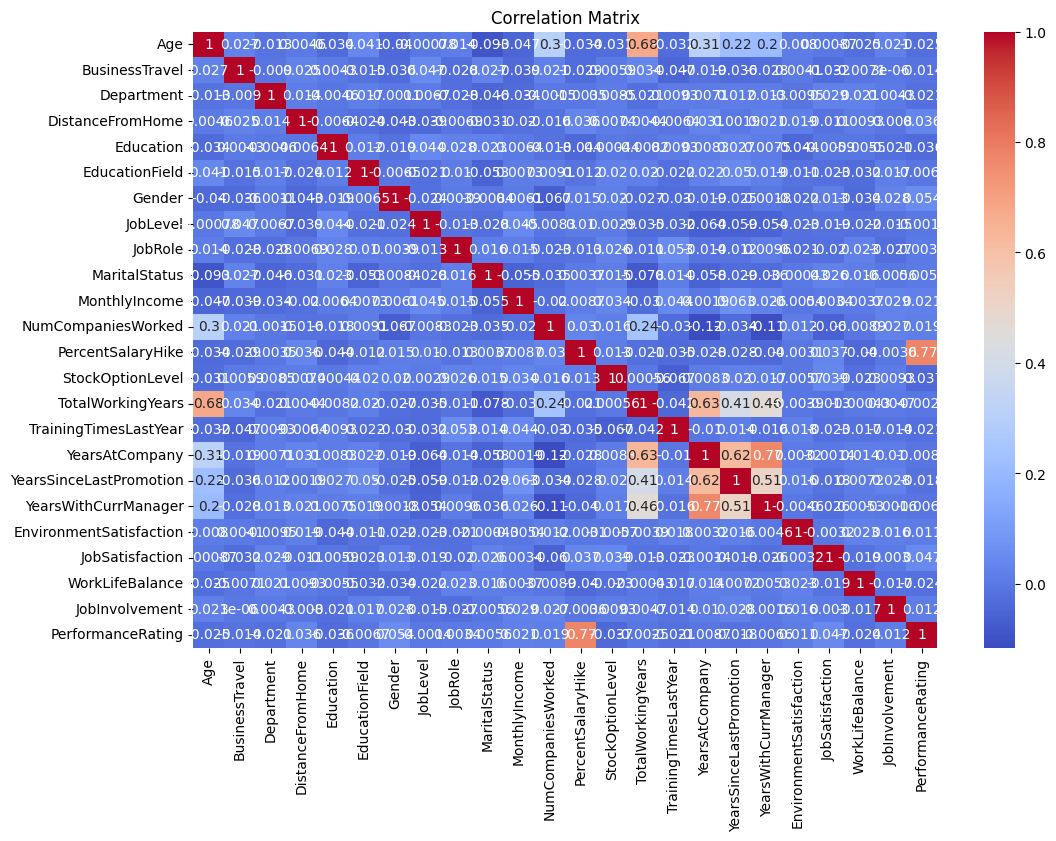

In [32]:
# Correlation matrix
correlation_matrix = X.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [35]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)

[[1072    0]
 [  39  179]]


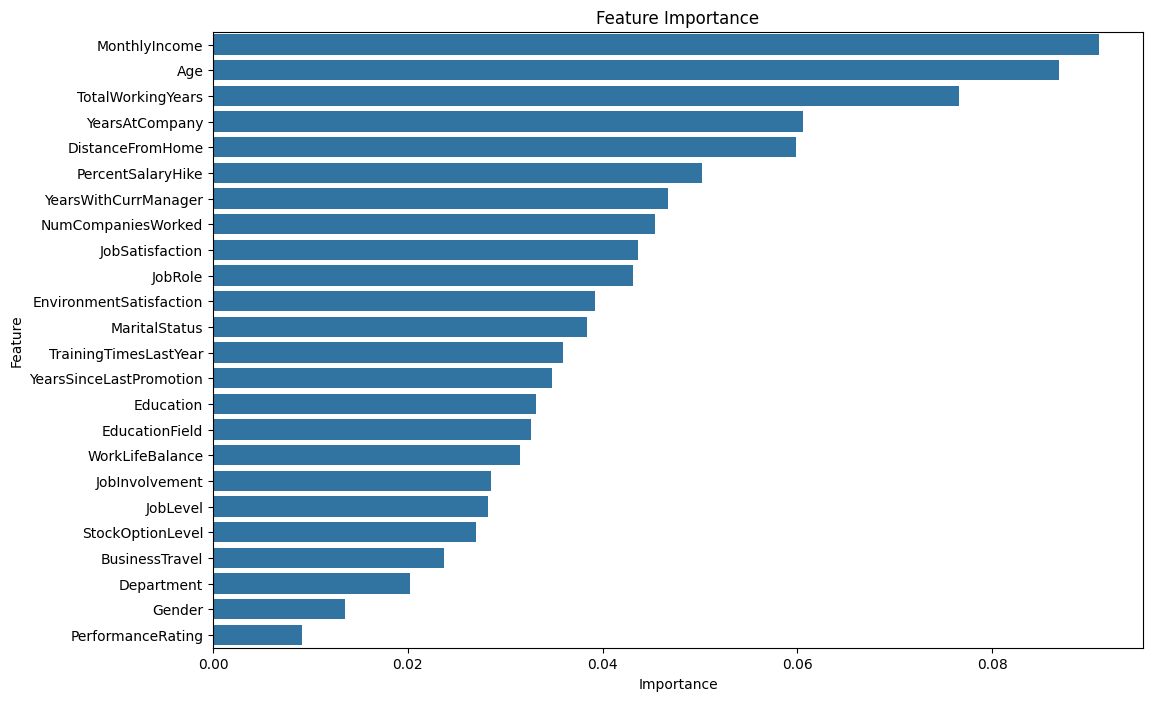

In [37]:
# Example using Random Forest for feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [38]:
print("Accuracy score:",accuracy_score(y_test, prediction))

Accuracy score: 0.9697674418604652


Text(195.72222222222223, 0.5, 'Expected')

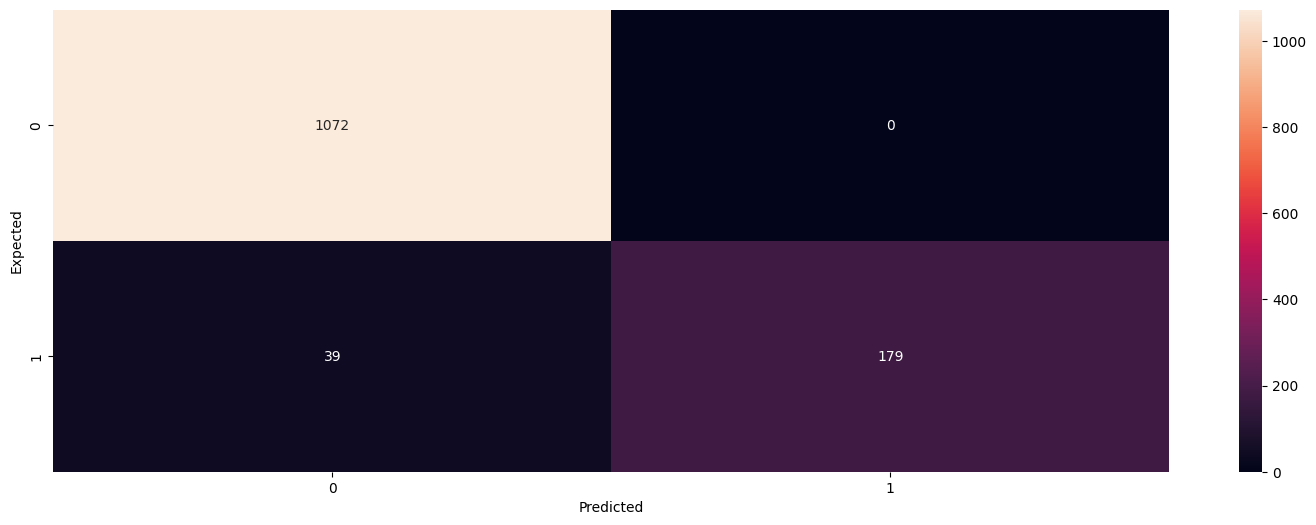

In [39]:
plt.figure(figsize = (18,6))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

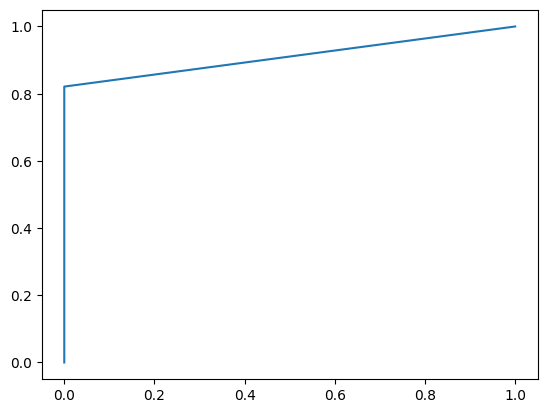

In [40]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.show()

In [41]:
import numpy as np

input_data = (37, 2, 1, 29, 4, 5, 0, 1, 2, 1, 78800, 3.0, 12, 1, 9.0, 2, 4, 0, 2, 3.0, 3.0, 2.0, 4, 3)

#Changing the input_data to numpy_array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are prediction for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

if (prediction[0] == 0):
    print("No")
else:
    print("Yes")

No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [43]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [44]:
input_data = (37, 2, 1, 29, 4, 5, 0, 1, 2, 1, 78800, 3.0, 12, 1, 9.0, 2, 4, 0, 2, 3.0, 3.0, 2.0, 4, 3)


# Prepare the input data
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = loaded_model.predict(input_data_reshape)

# Output the prediction
if prediction[0] == 0:
    print("The employee will not attrite.")
else:
    print("The employee will attrite.")

The employee will not attrite.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
